In this project, I aimed to develop a multi-label text classification model capable of predicting the relevant categories for academic papers taken from the Arxiv database based on their abstracts. The goal was to assist researchers, academics, and students in efficiently navigating through vast repositories of scholarly articles by automatically tagging each paper with appropriate subject labels.

### Methodology:

I adopted a deep learning approach using TensorFlow and Keras to build our classification models. I tried out different models such as FNN, CNN1D. However, the best one was LSTMs with similar results as CNN1D but slightly better. The final selected model architecture consisted of multiple layers including embeddings, LSTM (Long Short-Term Memory) layers, global max pooling, dense layers, and dropout regularization. I utilized the binary cross-entropy loss function and the Adam optimizer for training. To handle the multi-label nature of the problem, I employed the One-vs-Rest strategy and utilized the sigmoid activation function in the output layer to produce probabilities for each label independently.

### Results Based on Outputs of Chosen Final Model:

1. **Model Performance:** The developed multi-label text classification model demonstrated competitive performance across various metrics. It achieved notable F1-scores for micro, macro, and weighted averaging techniques, indicating its effectiveness in classifying academic papers into multiple categories simultaneously.

2. **Evaluation Metrics:**
    - **Micro-Averaging:** Achieved a micro F1-score of 0.773, precision of 0.943, and recall of 0.656. This indicates the model's ability to compute metrics globally by considering each element of the label set as a binary prediction.
    - **Macro-Averaging:** Attained a macro F1-score of 0.462, precision of 0.972, and recall of 0.453. This demonstrates the model's capability to compute metrics for each class independently and then take the average, treating all classes equally.
    - **Weighted-Averaging:** Obtained a weighted F1-score of 0.670, precision of 0.959, and recall of 0.656. This illustrates the model's performance in computing metrics for each class independently and then taking the average, weighted by the number of true instances for each class.
3. **Inference Results:**
    - Conducted inference on a subset of test data, resulting in a Hamming loss of 0.125 on inference data, and 0.143 on overall test data, and 0.140 on validation data.
    - Achieved promising micro and macro F1-scores, indicating the model's ability to effectively predicting relevant categories for unseen academic papers.
4. **Correctness Analysis:**
    - Out of 100 samples from the inference set, the model correctly predicted the labels for 53 samples, while incorrectly predicting the labels for 47 samples.

### Conclusion:
In conclusion, the developed multi-label text classification model has demonstrated significant capabilities in categorizing academic papers based on their abstracts. Through the utilization of deep learning techniques, particularly LSTM networks, the model has achieved competitive performance across various evaluation metrics, including F1-score, precision, recall, and Hamming loss. This achievement signifies a substantial step towards assisting researchers, academics, and students in efficiently navigating through extensive repositories of scholarly articles, thereby enhancing the accessibility and usability of academic literature. While the current model has shown promising results, there are several avenues for further enhancement and exploration using pre-trained language models such as BERT or GPT to fine-tune on the academic paper dataset can potentially yield improved performance. Exploring transformer-based architectures, such as Transformer-XL, RoBERTa, or ALBERT, can offer a deeper understanding of the contextual relationships within academic texts. Implementing ensemble methods, such as stacking or blending, by combining multiple diverse models can further enhance the robustness and generalization capability of the classification system. 

### Preprocessing Our Data

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/arxiv-multi-label-text-classification-datasets/arxiv34k6L.csv")
df.head()

,Abstracts,categories
0,Reusing features in deep networks through dens...,['cs.CV']
1,Visual defect detection (VDD) for high-mix low...,['cs.CV']
2,Dense object detectors rely on the sliding-win...,['cs.CV']
3,The state-of-the-art object detection and imag...,['cs.CV']
4,This paper explores self-supervised learning o...,['cs.CV']


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34068 entries, 0 to 34067
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Abstracts   34068 non-null  object
 1   categories  34068 non-null  object
dtypes: object(2)
memory usage: 532.4+ KB


In [3]:
df.describe()

,Abstracts,categories
count,34068,34068
unique,27256,6
top,Graph Representation Learning (GRL) is an infl...,['cs.LG']
freq,6,8140


In [4]:
len(df)

34068

In [5]:
sum(df["Abstracts"].duplicated())

6812

In [6]:
specific_duplicates = df[df['Abstracts'].duplicated()]
specific_duplicates

,Abstracts,categories
1845,The paradigm of self-supervision focuses on re...,['cs.CV']
1913,The linear take-make-dispose paradigm at the f...,['cs.CV']
1915,Self-supervised masked image modeling has show...,['cs.CV']
1916,Satellite Image Time Series (SITS) representat...,['cs.CV']
1928,"Despite its clinical utility, medical image se...",['cs.CV']
...,...,...
34052,Variational autoencoders (VAEs) are a powerful...,"['cs.LG', 'stat.ML']"
34053,Graph Attention Network (GAT) and GraphSAGE ar...,"['cs.LG', 'stat.ML']"
34060,The robustness of machine learning algorithms ...,"['cs.LG', 'stat.ML']"
34061,The real-world data usually exhibits heterogen...,"['cs.LG', 'stat.ML']"


In [7]:
new_df = df[~df['Abstracts'].duplicated()]
new_df

,Abstracts,categories
0,Reusing features in deep networks through dens...,['cs.CV']
1,Visual defect detection (VDD) for high-mix low...,['cs.CV']
2,Dense object detectors rely on the sliding-win...,['cs.CV']
3,The state-of-the-art object detection and imag...,['cs.CV']
4,This paper explores self-supervised learning o...,['cs.CV']
...,...,...
34062,One of the main challenges in imitation learni...,"['cs.LG', 'stat.ML']"
34064,The wide-spread adoption of representation lea...,"['cs.LG', 'stat.ML']"
34065,This work pioneers regret analysis of risk-sen...,"['cs.LG', 'stat.ML']"
34066,Graphs arise naturally in many real-world appl...,"['cs.LG', 'stat.ML']"


In [8]:
sum(new_df["Abstracts"].duplicated())

0

In [9]:
new_df.groupby("categories").count()

,Abstracts
categories,
"['cs.CV', 'cs.AI']",2692
"['cs.CV', 'cs.LG']",2691
['cs.CV'],7593
"['cs.LG', 'cs.AI']",4475
"['cs.LG', 'stat.ML']",3641
['cs.LG'],6164


In [10]:
new_df.shape

(27256, 2)

In [11]:
new_df["categories"][0][0] # since the elements in this columns are strings we need to convert them to list

'['

In [12]:
import ast
new_df.loc[:, "categories"] = new_df["categories"].apply(lambda x: ast.literal_eval(x))

In [13]:
new_df["categories"].values

array([list(['cs.CV']), list(['cs.CV']), list(['cs.CV']), ...,
       list(['cs.LG', 'stat.ML']), list(['cs.LG', 'stat.ML']),
       list(['cs.LG', 'stat.ML'])], dtype=object)

#### Split Data In Train, Test, And Val

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size = 0.1, stratify = new_df['categories'].values)

In [15]:
train_df.shape, test_df.shape

((24530, 2), (2726, 2))

In [16]:
val_df = test_df.sample(frac = 0.5) 
val_df.shape

(1363, 2)

In [17]:
test_df.drop(val_df.index, inplace = True)
test_df.shape

(1363, 2)

In [18]:
train_df["Abstracts"].apply(lambda x: len(x.split(" "))).describe()  # for selecting sequence lengths 

count    24530.000000
mean       161.909458
std         40.073985
min          5.000000
25%        134.000000
50%        161.000000
75%        188.000000
max        317.000000
Name: Abstracts, dtype: float64

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

2024-06-02 16:35:12.155378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 16:35:12.155468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 16:35:12.258932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Binarize The Labels

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(train_df["categories"])

MultiLabelBinarizer()

In [21]:
binary_labels_train = mlb.transform(train_df['categories'])

In [22]:
binary_labels_val = mlb.transform(val_df['categories'])
binary_labels_test = mlb.transform(test_df['categories'])

#### Prepapre Data 

In [23]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_df["Abstracts"].values, binary_labels_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((val_df["Abstracts"].values, binary_labels_val))
testing_dataset = tf.data.Dataset.from_tensor_slices((test_df["Abstracts"].values, binary_labels_test))

In [24]:
text_batch, label_batch = next(iter(training_dataset))

for text_batch, label_batch in training_dataset.take(5):
    print("Text:", text_batch.numpy())
    print("Label:", label_batch.numpy())

Text: b'In the last years, the consolidation of deep neural network architectures for\ninformation extraction in document images has brought big improvements in the\nperformance of each of the tasks involved in this process, consisting of text\nlocalization, transcription, and named entity recognition. However, this\nprocess is traditionally performed with separate methods for each task. In this\nwork we propose an end-to-end model that combines a one stage object detection\nnetwork with branches for the recognition of text and named entities\nrespectively in a way that shared features can be learned simultaneously from\nthe training error of each of the tasks. By doing so the model jointly performs\nhandwritten text detection, transcription, and named entity recognition at page\nlevel with a single feed forward step. We exhaustively evaluate our approach on\ndifferent datasets, discussing its advantages and limitations compared to\nsequential approaches. The results show that the mode

In [25]:
# unique words in the abstracts
sequence_length = 160
vocabulary = set()
train_df["Abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

136596


In [26]:
auto = tf.data.AUTOTUNE
vectorizer_layer = layers.TextVectorization(
    max_tokens=vocabulary_size, output_mode = "int", output_sequence_length = sequence_length
)

train_ds = training_dataset.map(lambda x, y: x)
vectorizer_layer.adapt(train_ds)

In [27]:
def vectorize_text(text, label):
    return vectorizer_layer(text), label

batch_size = 128
buffer_size = 1280

train_ds = training_dataset.map(vectorize_text, num_parallel_calls=auto).shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = validation_dataset.map(vectorize_text, num_parallel_calls=auto).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = testing_dataset.map(vectorize_text, num_parallel_calls=auto).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [28]:
text_batch, label_batch = next(iter(train_ds))
text_batch, label_batch

(<tf.Tensor: shape=(128, 160), dtype=int64, numpy=
 array([[    7,   536,  3317, ...,    37,    26,    31],
        [    8,    32,     6, ...,  3825,   500,   123],
        [    2,  1791, 16776, ...,    11,    76,  1337],
        ...,
        [ 1165,  1402,    38, ...,     2,   688,     3],
        [  505,     6,  5232, ...,   601,   124,    67],
        [    7,    13,    40, ...,     3,    16,    30]])>,
 <tf.Tensor: shape=(128, 4), dtype=int64, numpy=
 array([[1, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 1,

### Callbacks And Metrics

In [146]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose = 1)
reduce_lr_on_plateu = ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 3, verbose = 1)
early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True, mode='min', verbose = 1)

In [30]:
from tensorflow.keras.metrics import F1Score
f1_normal = F1Score(average=None, threshold=0.5, name="f1_normal")
f1_micro = F1Score(average="micro", threshold=0.5, name="f1_micro")
f1_macro = F1Score(average="macro", threshold=0.5, name="f1_macro")
f1_weighted = F1Score(average="weighted", threshold=0.5, name="f1_weighted")

#### Dense Model

In [147]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(keras.layers.Input(shape = (160,)))
model1.add(Dense(512, activation = "relu"))
model1.add(layers.Dropout(0.5))
model1.add(Dense(256, activation = "relu"))
model1.add(layers.Dropout(0.5))
model1.add(Dense(len(mlb.classes_), activation = "sigmoid"))

model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 512)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,788 (839.02 KB)

 Trainable params: 214,788 (839.02 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
model1.compile(loss = "binary_crossentropy",
               optimizer = keras.optimizers.Adam(),
               metrics = [f1_normal, f1_micro, f1_macro, f1_weighted])
history1 = model1.fit(train_ds, validation_data = val_ds, epochs = 30, callbacks=[early_stopping, reduce_lr_on_plateu, checkpoint])

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_macro: 0.4035 - f1_micro: 0.5088 - f1_normal: 0.4035 - f1_weighted: 0.5061 - loss: 754.6057
Epoch 1: val_loss improved from inf to 0.66592, saving model to best_model.keras
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - f1_macro: 0.4033 - f1_micro: 0.5087 - f1_normal: 0.4033 - f1_weighted: 0.5059 - loss: 752.2458 - val_f1_macro: 0.1918 - val_f1_micro: 0.4971 - val_f1_normal: 0.1918 - val_f1_weighted: 0.3181 - val_loss: 0.6659 - learning_rate: 0.0010
Epoch 2/30
182/192 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_macro: 0.2418 - f1_micro: 0.4926 - f1_normal: 0.2418 - f1_weighted: 0.3591 - loss: 5.7678
Epoch 2: val_loss improved from 0.66592 to 0.63701, saving model to best_model.keras
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_macro: 0.2410 - f1_micro: 0.4928 - f1_normal: 0.2410 - f1_weighted: 0.3585 - loss: 5.6589 - val_f1_macro: 0.1911 - val_f1_micro: 0.4966 - val_f1_normal: 0.1911 - val_f1_weighted: 0.3171 - val_loss: 0.6370 - lea

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(history):
    metrics = ['val_f1_macro', 'val_f1_micro', 'val_f1_weighted']
    plt.figure(figsize=(12, 8))
    
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
    plt.title('Model Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend(loc='upper right')
    plt.show()

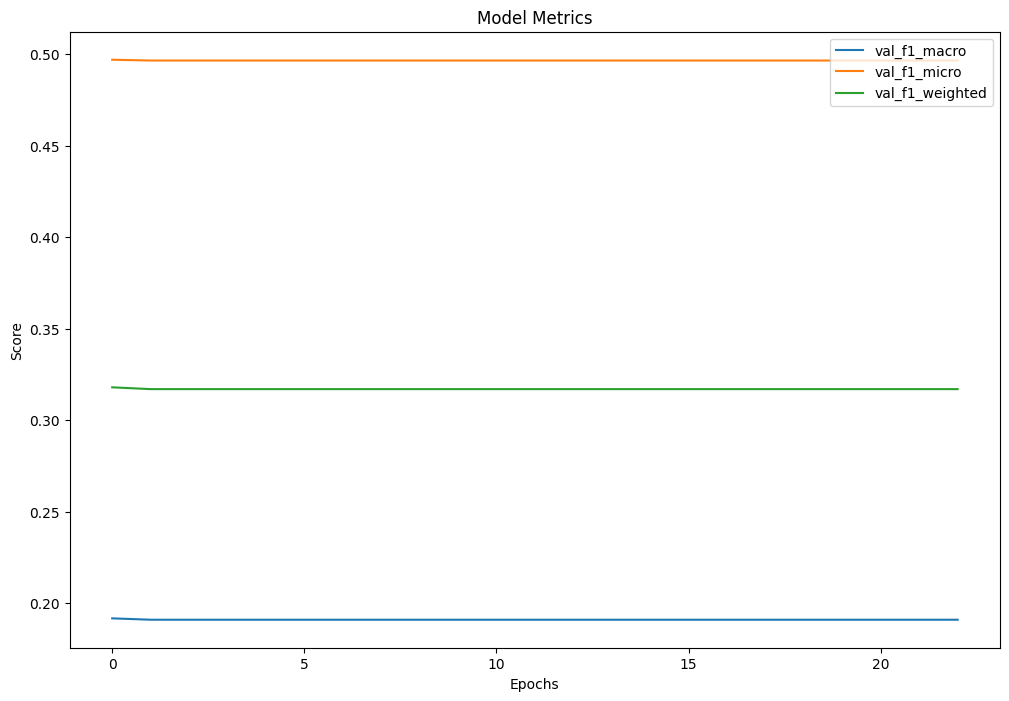

In [149]:
plot_metrics(history1)

In [150]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

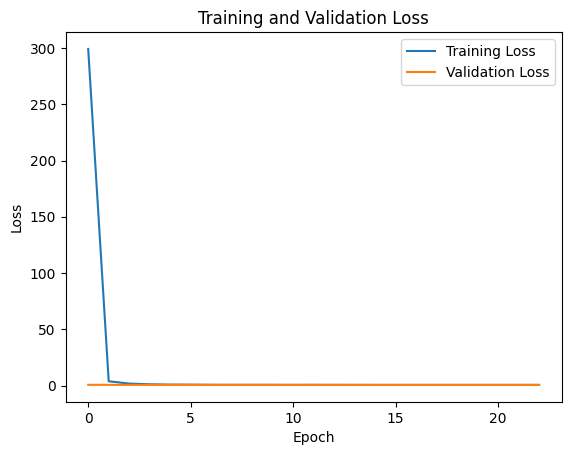

In [151]:
plot_loss(history1)

In [135]:
from sklearn.metrics import f1_score, precision_score, recall_score, multilabel_confusion_matrix, hamming_loss
def model_results(model, data):
    """
    Evaluates the performance of a multi-label classification model using different averaging techniques.

    """
    y_pred_probs = model.predict(data)
    y_true = np.concatenate([y for x, y in data], axis=0)
    y_pred = (y_pred_probs > 0.5).astype(int)
    
    hamming = hamming_loss(y_true, y_pred)
    mcm = multilabel_confusion_matrix(y_true, y_pred)
    print(f"Hamming Loss: {hamming}")
    print(f"Confusion Matrix:")
    print(mcm)
    print("\n")
    for averaging in ['micro', 'macro', 'weighted']:
        f1 = f1_score(y_true, y_pred, average=averaging, zero_division=1)
        precision = precision_score(y_true, y_pred, average=averaging, zero_division=1)
        recall = recall_score(y_true, y_pred, average=averaging, zero_division=1)
        if averaging == 'micro':
            description = "Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction."
        elif averaging == 'macro':
            description = "Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally."
        elif averaging == 'weighted':
            description = "Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class."
        
        print(f"Averaging Technique ({averaging}):{description}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print("\n")

In [152]:
model_results(model1, val_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Hamming Loss: 0.31346294937637564
Confusion Matrix:
[[[1025    0]
  [ 338    0]]

 [[ 697    0]
  [ 666    0]]

 [[   0  520]
  [   0  843]]

 [[1178    0]
  [ 185    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.4966126656848306
Precision: 0.6184886280264124
Recall: 0.41486220472440943


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.19106980961015413
Precision: 0.9046221570066031
Recall: 0.25


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.3170705698845668
Precision: 0.8417253510956032
Recall: 0.41486220472440943




In [153]:
model_results(model1, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Hamming Loss: 0.3112619222303742
Confusion Matrix:
[[[ 984    0]
  [ 379    0]]

 [[ 732    0]
  [ 631    0]]

 [[   0  508]
  [   0  855]]

 [[1184    0]
  [ 179    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.5019078368065747
Precision: 0.6272927366104182
Recall: 0.41829745596868884


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.19274120829576194
Precision: 0.9068231841526045
Recall: 0.25


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.3224926283617935
Precision: 0.8440974999030859
Recall: 0.41829745596868884




### ConvNets

In [154]:
inputs = layers.Input(shape=(160,))
x = layers.Embedding(vocabulary_size, 128)(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(128, kernel_size=3, padding="valid", activation='relu', strides=3)(x)  
x = layers.Conv1D(128, kernel_size=3, padding="valid", activation='relu', strides=3)(x)
x = layers.Conv1D(64, kernel_size = 3, padding = "valid", activation = 'relu', strides = 3)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(len(mlb.classes_), activation="sigmoid", name="outputs")(x)
model2 = keras.Model(inputs, outputs)

model2.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_15 (Embedding)        │ (None, 160, 128)       │    17,484,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 160, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 53, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 17, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 5, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_16         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,624,324 (67.23 MB)

 Trainable params: 17,624,324 (67.23 MB)

 Non-trainable params: 0 (0.00 B)

In [155]:
model2.compile(loss = "binary_crossentropy",
               optimizer = keras.optimizers.Adam(),
               metrics = [f1_normal, f1_micro, f1_macro, f1_weighted])
history2 = model2.fit(train_ds, validation_data = val_ds, epochs = 30, callbacks = [reduce_lr_on_plateu, early_stopping, checkpoint])

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - f1_macro: 0.3135 - f1_micro: 0.5299 - f1_normal: 0.3135 - f1_weighted: 0.4490 - loss: 0.6143
Epoch 1: val_loss improved from 0.57894 to 0.34855, saving model to best_model.keras
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - f1_macro: 0.3136 - f1_micro: 0.5302 - f1_normal: 0.3136 - f1_weighted: 0.4492 - loss: 0.6141 - val_f1_macro: 0.4504 - val_f1_micro: 0.7628 - val_f1_normal: 0.4504 - val_f1_weighted: 0.6676 - val_loss: 0.3486 - learning_rate: 0.0010
Epoch 2/30
189/192 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_macro: 0.4932 - f1_micro: 0.7599 - f1_normal: 0.4932 - f1_weighted: 0.6849 - loss: 0.3711
Epoch 2: val_loss did not improve from 0.34855
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_macro: 0.4930 - f1_micro: 0.7601 - f1_normal: 0.4930 - f1_weighted: 0.6849 - loss: 0.3707 - val_f1_macro: 0.4531 - val_f1_micro: 0.7681 - val_f1_normal: 0.4531 - val_f1_weighted: 0.6722 - val_loss: 0.3498 - learning_rate: 0.0010
Epoch 3/30
188/192 

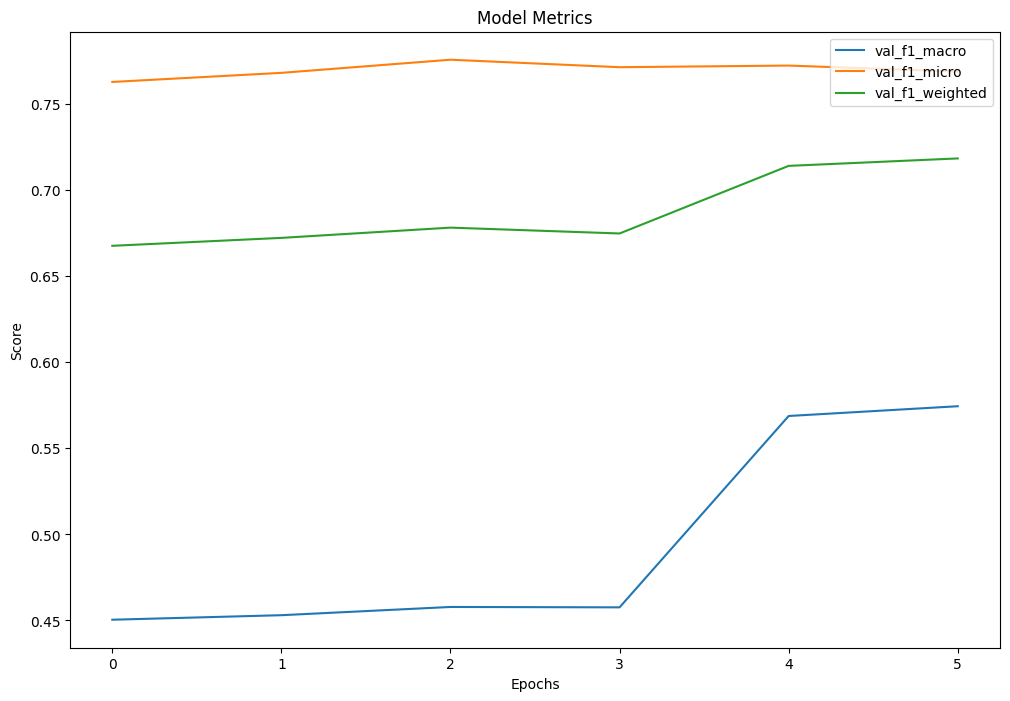

In [156]:
plot_metrics(history2)

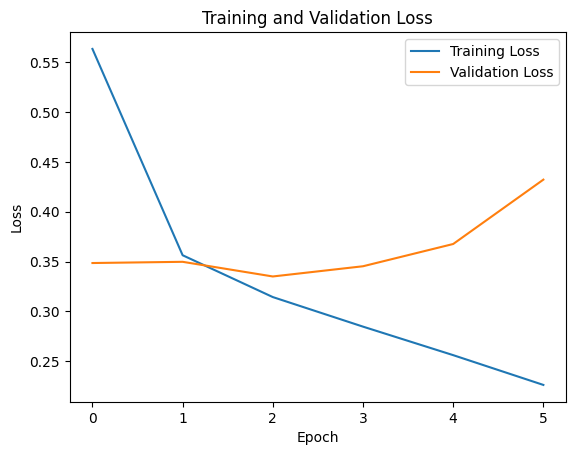

In [157]:
plot_loss(history2)

In [158]:
model_results(model2, val_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Hamming Loss: 0.14288334556126192
Confusion Matrix:
[[[1025    0]
  [ 338    0]]

 [[ 671   26]
  [  56  610]]

 [[ 452   68]
  [ 106  737]]

 [[1178    0]
  [ 185    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7756982435934351
Precision: 0.9347675225537821
Recall: 0.6628937007874016


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4578593612515473
Precision: 0.9686618617914763
Recall: 0.4475436290382909


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.678173834437995
Precision: 0.9515569129022942
Recall: 0.6628937007874016




In [159]:
model_results(model2, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Hamming Loss: 0.14416727806309612
Confusion Matrix:
[[[ 984    0]
  [ 379    0]]

 [[ 699   33]
  [  47  584]]

 [[ 454   54]
  [  94  761]]

 [[1184    0]
  [ 179    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7738780207134636
Precision: 0.9392458100558659
Recall: 0.6580234833659491


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4618186703516045
Precision: 0.9700644320927504
Recall: 0.45389338374991894


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.6701461971435723
Precision: 0.9557734387527843
Recall: 0.6580234833659491




In [162]:
model2.save("model2.keras")

### Recurrent 

In [163]:
inputs = keras.Input(shape = (160,))
x = layers.Embedding(vocabulary_size, 128)(inputs)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(32, return_sequences = True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(16, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(mlb.classes_), activation = "sigmoid", name = "predictions")(x)

model3 = keras.Model(inputs, outputs)
model3.compile(loss = "binary_crossentropy",
               optimizer = keras.optimizers.Adam(),
               metrics = [f1_normal, f1_micro, f1_macro, f1_weighted])


model3.summary()

history3 = model3.fit(train_ds, validation_data = val_ds, epochs = 30, callbacks = [reduce_lr_on_plateu, early_stopping, checkpoint])

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_16 (Embedding)        │ (None, 160, 128)       │    17,484,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 160, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 160, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 160, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_17         │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,678,292 (67.44 MB)

 Trainable params: 17,678,292 (67.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
191/192 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - f1_macro: 0.4258 - f1_micro: 0.6286 - f1_normal: 0.4258 - f1_weighted: 0.5717 - loss: 0.5618
Epoch 1: val_loss did not improve from 0.33508
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - f1_macro: 0.4260 - f1_micro: 0.6290 - f1_normal: 0.4260 - f1_weighted: 0.5722 - loss: 0.5611 - val_f1_macro: 0.4532 - val_f1_micro: 0.7667 - val_f1_normal: 0.4532 - val_f1_weighted: 0.6714 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 2/30
191/192 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - f1_macro: 0.4768 - f1_micro: 0.7411 - f1_normal: 0.4768 - f1_weighted: 0.6710 - loss: 0.4013
Epoch 2: val_loss improved from 0.33508 to 0.33121, saving model to best_model.keras
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - f1_macro: 0.4767 - f1_micro: 0.7412 - f1_normal: 0.4767 - f1_weighted: 0.6710 - loss: 0.4011 - val_f1_macro: 0.4598 - val_f1_micro: 0.7779 - val_f1_normal: 0.4598 - val_f1_weighted: 0.6808 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 3/30
191/192 

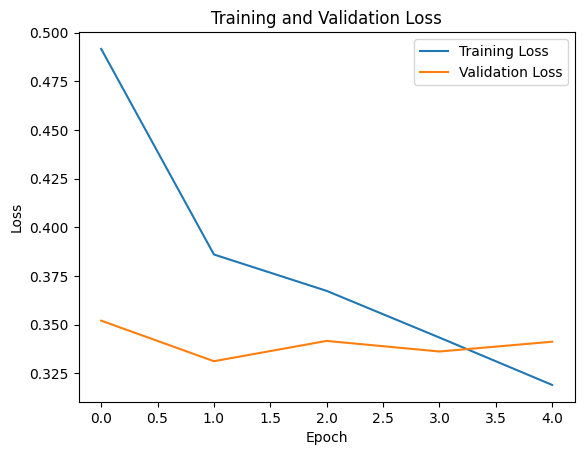

In [164]:
plot_loss(history3)

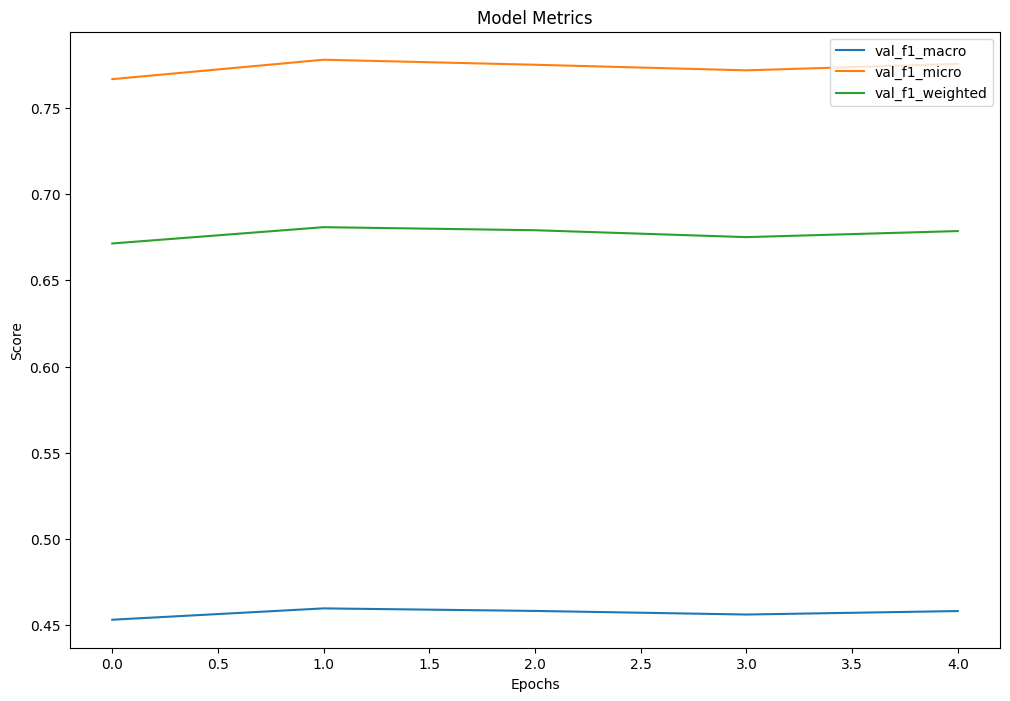

In [165]:
plot_metrics(history3)

In [166]:
model_results(model3, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Hamming Loss: 0.14398385913426265
Confusion Matrix:
[[[ 984    0]
  [ 379    0]]

 [[ 697   35]
  [  43  588]]

 [[ 462   46]
  [ 103  752]]

 [[1184    0]
  [ 179    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7734487734487735
Precision: 0.9429978888106967
Recall: 0.6555772994129159


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4619149755265908
Precision: 0.971544028610853
Recall: 0.4528465908564332


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.6700989386766182
Precision: 0.9585444459452244
Recall: 0.6555772994129159




In [170]:
model_results(model3, val_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Hamming Loss: 0.14031548055759355
Confusion Matrix:
[[[1025    0]
  [ 338    0]]

 [[ 669   28]
  [  47  619]]

 [[ 475   45]
  [ 122  721]]

 [[1178    0]
  [ 185    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7779390420899854
Precision: 0.9483368719037509
Recall: 0.6594488188976378


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4597719321580769
Precision: 0.9744941505482222
Recall: 0.44617704893505605


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.6808372979120918
Precision: 0.9614440180790867
Recall: 0.6594488188976378




In [167]:
inputs = keras.Input(shape = (160,))
x = layers.Embedding(vocabulary_size, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(32, return_sequences = True))(x)
x = layers.LSTM(16, return_sequences = True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(16, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(mlb.classes_), activation = "sigmoid", name = "predictions")(x)

model4 = keras.Model(inputs, outputs)
model4.compile(loss = "binary_crossentropy",
               optimizer = keras.optimizers.Adam(),
               metrics = [f1_normal, f1_micro, f1_macro, f1_weighted])

model4.summary()

history4 = model4.fit(train_ds, validation_data = val_ds, epochs = 30, callbacks = [reduce_lr_on_plateu, early_stopping])

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_17 (Embedding)        │ (None, 160, 128)       │    17,484,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 160, 128)       │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 160, 64)        │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 160, 16)        │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_18         │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,629,844 (67.25 MB)

 Trainable params: 17,629,844 (67.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - f1_macro: 0.3696 - f1_micro: 0.5500 - f1_normal: 0.3696 - f1_weighted: 0.5095 - loss: 0.6347 - val_f1_macro: 0.4487 - val_f1_micro: 0.7599 - val_f1_normal: 0.4487 - val_f1_weighted: 0.6652 - val_loss: 0.4171 - learning_rate: 0.0010
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - f1_macro: 0.5246 - f1_micro: 0.7221 - f1_normal: 0.5246 - f1_weighted: 0.6883 - loss: 0.4451 - val_f1_macro: 0.4579 - val_f1_micro: 0.7750 - val_f1_normal: 0.4579 - val_f1_weighted: 0.6784 - val_loss: 0.3420 - learning_rate: 0.0010
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - f1_macro: 0.4701 - f1_micro: 0.7691 - f1_normal: 0.4701 - f1_weighted: 0.6778 - loss: 0.3600 - val_f1_macro: 0.4586 - val_f1_micro: 0.7759 - val_f1_normal: 0.4586 - val_f1_weighted: 0.6792 - val_loss: 0.3414 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


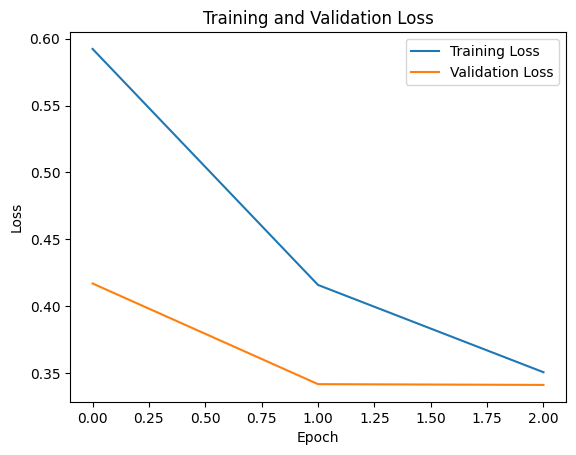

In [168]:
plot_loss(history4)

In [169]:
model_results(model4, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Hamming Loss: 0.15187087307410124
Confusion Matrix:
[[[ 984    0]
  [ 379    0]]

 [[ 672   60]
  [  43  588]]

 [[ 466   42]
  [ 125  730]]

 [[1184    0]
  [ 179    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7609699769053119
Precision: 0.928169014084507
Recall: 0.6448140900195695


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4542063583978917
Precision: 0.9632508155824218
Recall: 0.4464138423184215


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.6592098036997203
Precision: 0.9486587720316161
Recall: 0.6448140900195695




In [171]:
model3.save("best_model3.keras")

In [174]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model3.keras')

model_results(best_model, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Hamming Loss: 0.14398385913426265
Confusion Matrix:
[[[ 984    0]
  [ 379    0]]

 [[ 697   35]
  [  43  588]]

 [[ 462   46]
  [ 103  752]]

 [[1184    0]
  [ 179    0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.7734487734487735
Precision: 0.9429978888106967
Recall: 0.6555772994129159


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4619149755265908
Precision: 0.971544028610853
Recall: 0.4528465908564332


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.6700989386766182
Precision: 0.9585444459452244
Recall: 0.6555772994129159




### Making final prediction on 100 samples from test set

In [185]:
inference_df = test_df.sample(100)
binary_labels_inference = mlb.transform(inference_df['categories'])
inference_dataset = tf.data.Dataset.from_tensor_slices((inference_df["Abstracts"].values, binary_labels_inference))
inference_dataset = inference_dataset.map(vectorize_text, num_parallel_calls=auto).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [182]:
text_batch, label_batch = next(iter(inference_dataset))

In [186]:
predictions = best_model.predict(inference_dataset)
binary_predictions = (predictions > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [190]:
model_results(best_model, inference_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Hamming Loss: 0.125
Confusion Matrix:
[[[80  0]
  [20  0]]

 [[48  2]
  [ 2 48]]

 [[32  2]
  [13 53]]

 [[89  0]
  [11  0]]]


Averaging Technique (micro):Micro-averaging computes metrics globally by considering each element of the label set as a binary prediction.
F1 Score: 0.8015873015873015
Precision: 0.9619047619047619
Recall: 0.6870748299319728


Averaging Technique (macro):Macro-averaging computes metrics for each class independently and then takes the average, treating all classes equally.
F1 Score: 0.4590082644628099
Precision: 0.980909090909091
Recall: 0.44075757575757574


Averaging Technique (weighted):Weighted-averaging computes metrics for each class independently and then takes the average, weighted by the number of true instances for each class.
F1 Score: 0.7198515769944341
Precision: 0.9700680272108844
Recall: 0.6870748299319728




In [189]:
decoded_predictions = mlb.inverse_transform(binary_predictions)
decoded_predictions

[('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV', 'cs.LG'),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV', 'cs.LG'),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.CV', 'cs.LG'),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV', 'cs.LG'),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV',),
 ('cs.LG',),
 ('cs.CV', 'cs.LG'),
 ('cs.CV',)

In [194]:
correctness = np.array([np.array_equal(pred, true) for pred, true in zip(binary_predictions, binary_labels_inference)])
correctness

array([False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False])

In [195]:
results_df = pd.DataFrame({
    'Abstract': inference_df['Abstracts'].values,
    'True Labels': [list(label) for label in binary_labels_inference],
    'Predicted Labels': [list(pred) for pred in binary_predictions],
    'Correct': correctness
})

results_df

,Abstract,True Labels,Predicted Labels,Correct
0,Purpose: Image classification may be the funda...,"[1, 1, 0, 0]","[0, 1, 0, 0]",False
1,Electric Vehicle (EV) has become a preferable ...,"[0, 0, 1, 0]","[0, 0, 1, 0]",True
2,The paper concentrates on improvement of segme...,"[0, 1, 0, 0]","[0, 1, 0, 0]",True
3,The book attempts to introduce a gentle introd...,"[1, 1, 0, 0]","[0, 1, 0, 0]",False
4,We study the offline meta-reinforcement learni...,"[0, 0, 1, 1]","[0, 0, 1, 0]",False
...,...,...,...,...
95,"In this paper, we propose an end-to-end group-...","[0, 1, 0, 0]","[0, 1, 0, 0]",True
96,Clustering is one of the fundamental problems ...,"[0, 0, 1, 0]","[0, 1, 0, 0]",False
97,Deep generative models have recently emerged a...,"[0, 0, 1, 0]","[0, 0, 1, 0]",True
98,Graph Convolutional Networks (GCNs) are powerf...,"[0, 0, 1, 0]","[0, 0, 1, 0]",True


In [200]:
correct_labels_df = results_df[results_df['Correct'] == True]
incorrect_labels_df = results_df[results_df['Correct'] == False]

print("Correctly Predicted Samples:", len(correct_labels_df))
print("\nIncorrectly Predicted Samples:", len(incorrect_labels_df))

Correctly Predicted Samples: 53

Incorrectly Predicted Samples: 47


In [202]:
train_df.to_csv("train_df.csv", index=False)
val_df.to_csv("val_df.csv", index = False)
test_df.to_csv("test_df.csv", index = False)
inference_df.to_csv("inference_df.csv", index = False)